<a href="https://colab.research.google.com/github/AsatryanAni/Python2_course/blob/main/Online_shopping_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Նախագծի նկարագրություն

Սույն նախագիծը իրենից ներկայացնում է էլեկտրոնային խանութի՝ մասնավորապես հագուստի և աքսեսուարների էլեկտրոնային խանութի ծրագիր։

Նախագիծը ստեղծելու համար կատարվել են հետևյալ քայլերը․

1․ Պատրաստվել է UML դիագրամ, որը նկարագրում է կապը "Գնորդ" և "Վաճառող" օգտատերերի համար ստեղծված համապատասխան կլասների միջև,

2․ Ստեղծվել են համապատասխան կլասներ, որոնք պայմանականորեն բաժանվել են 2 խմբի․
    
    "Վաճառող" օգտատիրոջ համար ստեղծված կլասներ՝
        *   Category - Վաճառվող ապրանքների կատեգորիայի կլաս
        *   Product - Վաճառվող ապրանքների կլաս
        *   Person - Ծնող կլաս, որից ժառանգվել են Courier, Supplier և RegisteredUser կլասները
        *   Courier - Առաքիչների կլաս
        *   Supplier - Մատակարարների կլաս
        *   ProductManagment - Խանութի մենեջերի ֆունկցիաների կլաս, որը հնարավորություն է ընձեռում ավելացնել և հեռացնել ապրանքներ, կատեգորիաներ, առաքիչներ, մատակարարներ, ինչպես նաև փնտրել արժեքներ տարբեր կլասների մեջ
        
    "Գնորդ" օգտատիրոջ համար ստեղծված կլասներ՝
        *   RegisteredUser - Գրանցված հաճախորդների կլաս։ Նախատեսվում է, որ միայն գրանցված հաճախորդները հնարավորություն կունենան գնում կատարել
        *   SignIn - Համակարգ մուտք գործելու կլաս
        *   OrderConstructor - Պատվերի հավաքման կլաս
        *   OrderDetail - Առաքման տվյալներ ավելացնելու կլաս
        *   Order - Պատվերի հաստատման կլաս
        *   Payment - Վճարման տարբերակի ընտրության կլաս
        *   CardPayment - Անկանխիկ վճարման դեպքում համապատասխան տվյալներ մուտքագրելու կլաս 
        *   UserManagment - Հաճախորդի ֆունկցիաների կլաս, որը հնարավորություն է ընձեռում գրանցվել համակարգում, մուտք գործել համակարգ, խմբագրել հաշիվը և պատվեր կատարել
        
3․ Ստեղծվել է առանձին կլաս և համապատասխան դիսկրիպտորներ getter-setter-ների համար,

4․ Ստեղծվել են առանձին ինտերֆեյսեր վաճառողի և գնորդի համար,

5․ Ստեղծված instance-ները պահվել են JSON տիպի ձևաչափով։     


### UML դիագրամ

Link - https://tinyurl.com/6bv99v5s

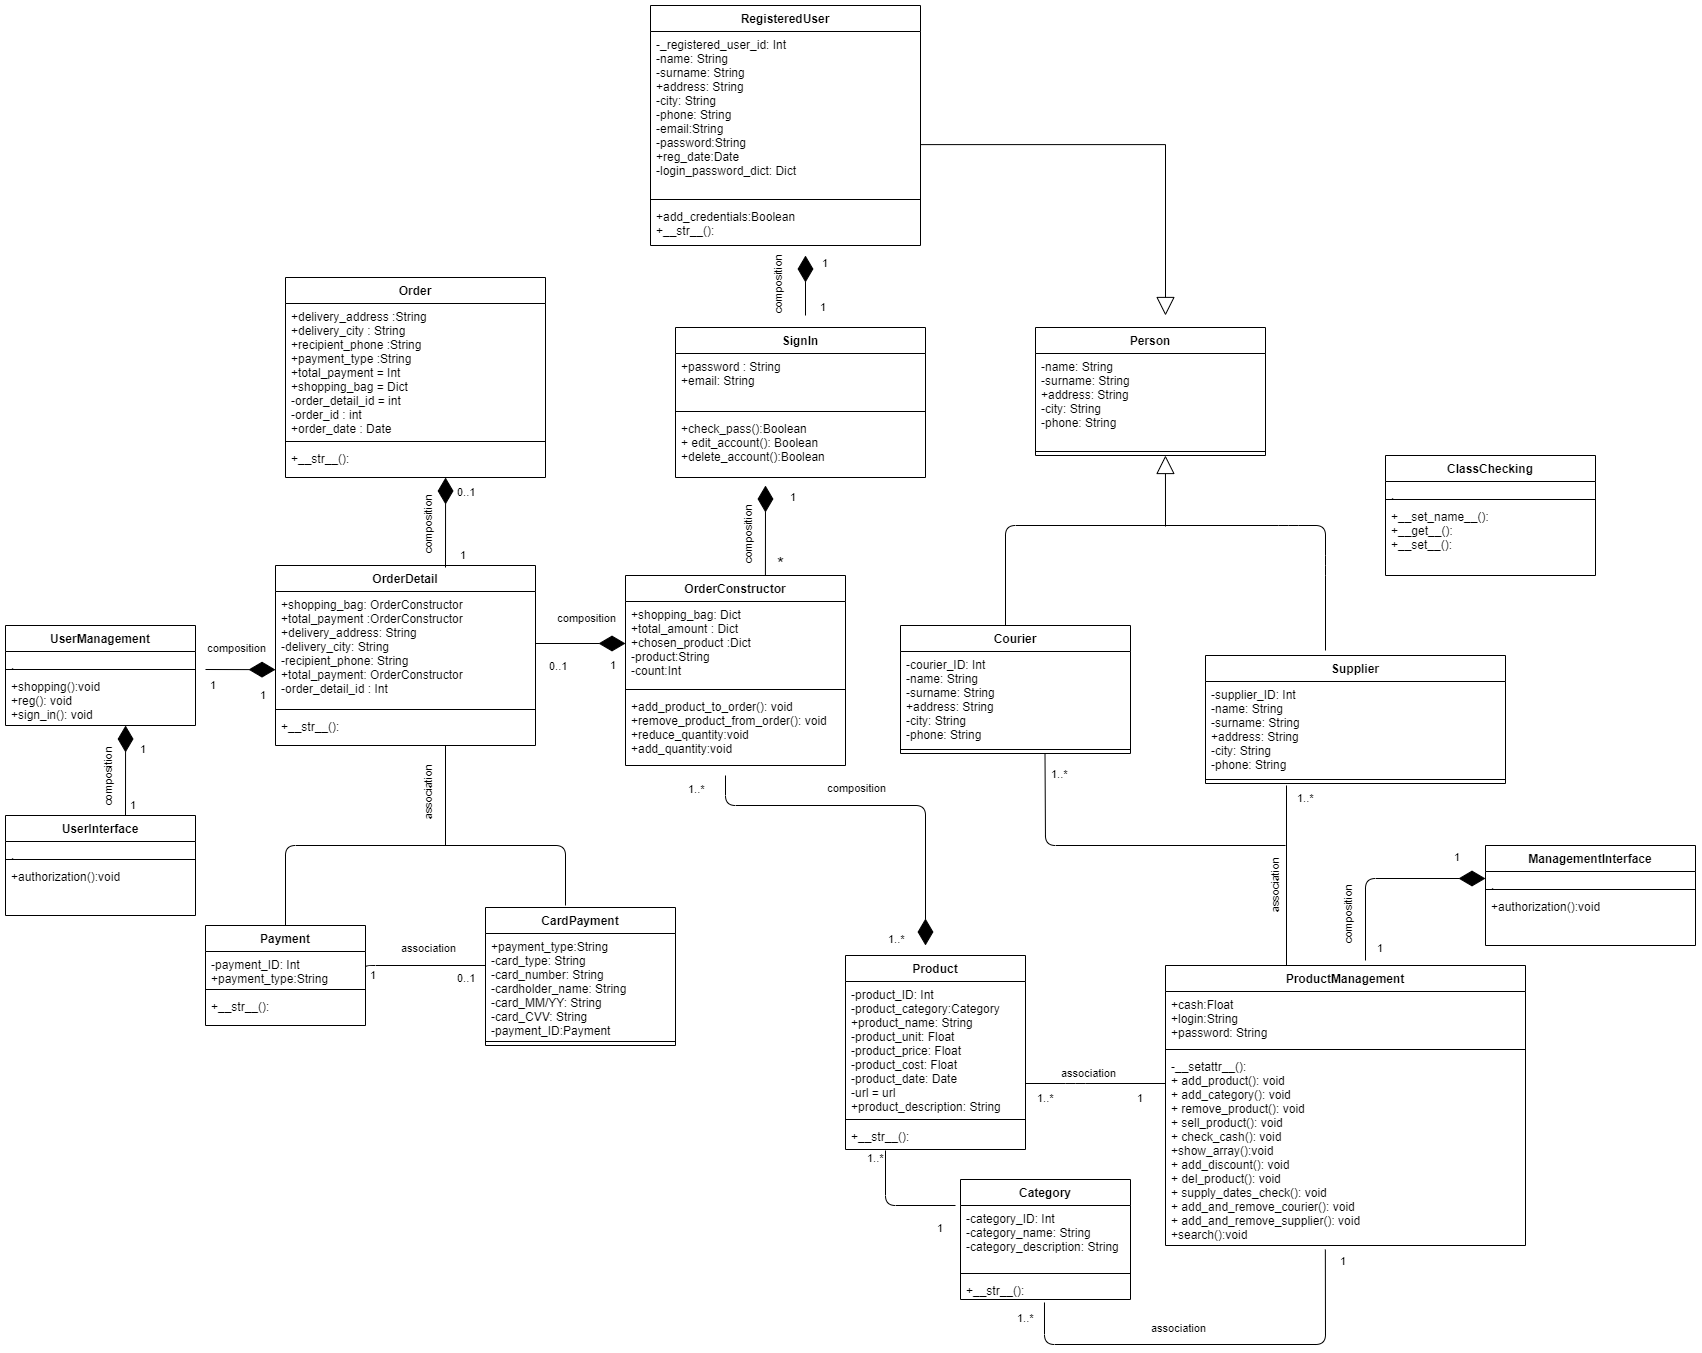

### Անհրաժեշտ գրադարանների ներմուծում 

In [ ]:
from datetime import datetime, date
import re
from PIL import Image
from urllib.request import urlopen
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io

### Դիսկրիպտորների ստեղծում

In [ ]:
class CheckFloat:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        try:
            if float(value) > 0:
                instance.__dict__[self.__name] = float(value)
            else:
                instance.__dict__[self.__name] =  'Wrong format'
        except ValueError:
            instance.__dict__[self.__name] =  'Wrong format'


In [ ]:
class CheckDate:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        check = value.split()
        if len(check) == 3:
            try:
                date(int(check[0]), int(check[1]), int(check[2]))
                instance.__dict__[self.__name] = date(int(check[0]), int(check[1]), int(check[2]))
            except ValueError:
                instance.__dict__[self.__name] =  'Wrong format'
        else:
            instance.__dict__[self.__name] =  'Wrong format'


In [ ]:
class CheckEmail:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        pattern = "^[^.][\w!#$%&\'\*\+\-\/\=\?\^\_\`\{\}\|\~\.]{1,64}[^.]@\w{1}[\w\-]{0,253}\w{1}\.[a-z]{2,}"
        result = re.fullmatch(pattern, value)
        if result:
            instance.__dict__[self.__name] = value
        else: 
            instance.__dict__[self.__name] =  'Wrong format'


In [ ]:
class CheckString:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        number = 0
        for i in value.split():
            if i.isalpha() == True:
                number += 1
        if number == len(value.split()):
            instance.__dict__[self.__name] = value
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [ ]:
class CheckMMYY:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        if (value.isnumeric() == True) and (len(value) == 4):
            if (value[0] == '0') and (value[1] in '123456789'):
                instance.__dict__[self.__name] = value[:2] + '/' + value[2:]
            elif (value[0] == '1') and (value[1] in '012'): 
                instance.__dict__[self.__name] = value[:2] + '/' + value[2:]
            else:
                instance.__dict__[self.__name] =  'Wrong format'
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [ ]:
class CheckCVV:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        if (value.isnumeric() == True) and (len(value) == 3):
            instance.__dict__[self.__name] = value
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [ ]:
class CheckCardNumber:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        if (value.isnumeric() == True) and (len(value) == 16):
            instance.__dict__[self.__name] = value
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [ ]:
class CheckCardholderName:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        number = 0
        for i in value.split():
            if (i.isalpha() == True) and (i.isupper() == True):
                number += 1
        if number == len(value.split()):
            instance.__dict__[self.__name] = value
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [ ]:
class CheckPhone:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        if (value[:4] == '+374') and ((len(value[4:]) == 8) and (value[4:].isnumeric() == True)):
            instance.__dict__[self.__name] = value
        elif (value[0] == '0') and ((len(value[1:]) == 8) and (value[1:].isnumeric() == True)):
            instance.__dict__[self.__name] = value
        else:
            instance.__dict__[self.__name] =  'Wrong format'

In [ ]:
class CheckUrl:
    def __set_name__(self, owner, name):
        self.__name = name
    
    def __get__(self, instance, owner):
        return instance.__dict__[self.__name]
        
    def __set__(self, instance, value):
        import cv2 as cv
        from google.colab.patches import cv2_imshow
        from skimage import io
        try :
            cv.cvtColor(io.imread(value), cv.COLOR_BGR2RGB)
            instance.__dict__[self.__name] = cv.cvtColor(io.imread(value), cv.COLOR_BGR2RGB)

        except ValueError:
            instance.__dict__[self.__name] = cv.cvtColor(io.imread("https://im0-tub-ru.yandex.net/i?id=507ebe6d4dc52b87c3d0028ae6dc10bc-l&n=13"), cv.COLOR_BGR2RGB)

### Ֆունկցիաների կլասի ստեղծում կոդի կրկնությունից խուսափելու համար 

In [ ]:
class Function:
    def for_print(x):
        print()
        print('Please choose the action: ')
        print()
        print(x)
        print()
        choose = input('Action ID: ')
        return choose     

### "Վաճառող" օգտատիրոջ կլասների ստեղծում

In [ ]:
class Category:
    category_name = CheckString()
    _category_id = 0

    def __init__(self, category_name, category_description=''):
        self.category_name = category_name
        self.category_description = category_description
        self.category_id = Category._category_id
        Category._category_id += 1

    def __str__(self):
        return f' Category ID - {self.category_id} \n Product categorty - {self.category_name}'
    
category1 = Category('Man')
category2 = Category('Woman')


category_array = [category1, category2]


In [ ]:
class Product:
    product_category = CheckString()
    product_unit = CheckFloat()
    product_price = CheckFloat()
    product_cost = CheckFloat()
    product_date = CheckDate()
    url = CheckUrl()
    _product_id = 0

    def __init__(self, product_category, product_name, product_unit, product_price, product_cost, product_date,
                 url="", product_description=''):
        self.product_category = product_category
        self.product_name = product_name
        self.product_unit = product_unit
        self.product_price = product_price
        self.product_cost = product_cost
        self.product_date = product_date
        self.url = url
        self.product_description = product_description
        self.product_id = Product._product_id
        Product._product_id += 1

    def __str__(self):
        return f' Product ID - {self.product_id} \n Product categorty - {self.product_category} \n Product - {self.product_name}  \n Unit - {self.product_unit} \n Price - {self.product_price} \n Cost - {self.product_cost} \n Description - {self.product_description}'

product1 = Product(category_array[0].category_name, 'White slim fit cotton shirt', "12", 29900, 15600, '2021 07 15','https://s7images.paulfredrick.com/is/image/PaulFredrick/140_W?%24TransPNGCategory%24&fbclid=IwAR0G6jXZBpxHAlLb7xZ2Pfa70vhSHtwiNLDt4ddIv45fN36rXfkQwRaVCbE', 'Autumn collection')
product2 = Product(category_array[1].category_name, 'Grey women coat', 20.0, 49900, 29700, '2021 07 10','https://ae01.alicdn.com/kf/HTB1qwEtSFXXXXa0aXXXq6xXFXXXW/New-Autumn-Winter-Women-Long-Big-Size-Grey-Coat-Woman-Top-Design-Casual-Clothes-Warm-Outfit.jpg?fbclid=IwAR3rSO4UQHHcUqOwrujme3g3ApxBuWiQMl1rRkoMhlvYAAIBxnBGLqjCv0Q')
product3 = Product(category_array[0].category_name, 'Nike Airmax', "15.0", "50000", "32000", '2021 07 9', 'https://static.nike.com/a/images/c_limit,w_592,f_auto/t_product_v1/a9b8bed7-d6fe-443e-9ae0-e1ff2b53ec76/air-max-bolt-shoe-qcn5kT.png?fbclid=IwAR2dMhF10VsfZ8pwuM4xyYqUUZggxLKlsrqbw5_jFnd-9VwR_t4o28ZJvxA', 'Nike Airmax Limited Edition')

product_array = [product1, product2, product3]


In [ ]:
class Person:
    name = CheckString()
    surname = CheckString()
    city = CheckString()
    phone = CheckPhone()
    def __init__(self, name, surname, address, city, phone):
        self.name = name
        self.surname = surname
        self.address = address
        self.city = city
        self.phone = phone

In [ ]:
class Courier(Person):
    _courier_id = 0

    def __init__(self, name, surname, address, city, phone):
        super().__init__(name, surname, address, city, phone)
        self.id = Courier._courier_id
        Courier._courier_id += 1

    def __str__(self):
        return f' Courier ID - {self.id} \n Courier - {self.name} {self.surname} \n Phone number - {self.phone}'

courier1 = Courier('Sargis', 'Arakelyan', 'Papazyan 16, apt. 24', 'Yerevan', '+37455678876')
courier2 = Courier('Suren', 'Sahakyan', 'Aygegortsner 5, h. 16', 'Artashat', '+37455456654')

courier_array = [courier1, courier2]

In [ ]:
class Supplier(Person):
    _supplier_id = 0
    def __init__(self, company, name, surname, address, city, phone):
        super().__init__(name, surname, address, city, phone)
        self.company = company
        self.id = Supplier._supplier_id
        Supplier._supplier_id += 1

    def __str__(self):
        return f' Supplier ID - {self.id} \n Supplier - {self.company} \n Address - {self.address}, {self.city} \n Contact person - {self.name} {self.surname} \n Phone number - {self.phone}'

supplier1 = Supplier('ABC LLC', 'Aram', 'Margaryan', 'Ulnetsi 15', 'Yerevan', '+37455444555')
supplier2 = Supplier('XYZ LLC', 'Tovmas', 'Petrosyan', 'Hatis 3', 'Abovyan', '+37455777888')

supplier_array = [supplier1, supplier2]

In [ ]:
class ProductManagement:
    cash = 1000000
    login = 'manager'
    password = '1211'

    def __setattr__(self, key, value):
        if key == 'password':
            raise AttributeError
        else:
            self.__dict__[key] = value

    @staticmethod
    def add_product():
        while True:
            new_product = Product(input('Product category: '),input('Product name: '),input('Product unit: '),input('Product price: '),input('Product cost: '),input('Product date: '),input('Image URL: '),input('Product description: '))
            if 'Wrong format' not in new_product.__dict__.values():
                product_array.append(new_product)
                ProductManagement.cash -= new_product.product_cost * new_product.product_unit
                return 'Thank you'
            else:
                Product._product_id -= 1
            print('Wrong format was given. Please try again. \n')
            again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
            if again != '1':
                return 'Thank you'

    @staticmethod
    def add_category():
        while True:
            new_category = Category(input('Category name: '),input('Category description: '))
            if 'Wrong format' not in new_category.__dict__.values():
                num = 0
                for i in category_array:
                    if i.category_name == new_category.category_name:
                        print('This category already exists.')
                        again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                        if again != '1':
                            return 'Thank you'
                        num += 1
                if num == 0:
                    category_array.append(new_category)
                    return 'Thank you'
                else:
                    Category._category_id -= 1
                    
            else:
                Category._category_id -= 1
                print('Wrong format was given. Please try again. \n')
                again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                if again != '1':
                    return 'Thank you'
                
    @staticmethod
    def remove_product():
        while True:
            removed_product = input('Please input the product you want to remove: ')
            removed_quantity = input('Please input the quantity you want to remove: ')
            for i in product_array:
                if i.product_name == removed_product: 
                    if int(removed_quantity) <= i.product_unit:
                        i.product_unit -= int(removed_quantity)
                        return 'Thank you'
                    else:
                        print('Not enough products in stock.')
                        return 'Thank you'
                elif i == product_array[-1]:
                    print('No product with such name was found. \n')
                    again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                    if again != '1':
                        return 'Thank you'                  
                    
    @staticmethod
    def sell_product():
        while True:
            sold_product = input('Please input the product you want to sell: ')
            sold_quantity = input('Please input the quantity you want to sell: ')
            for i in product_array:
                if i.product_name == sold_product: 
                    if int(sold_quantity) <= i.product_unit:
                        i.product_unit -= int(sold_quantity)
                        ProductManagement.cash += int(sold_quantity) * i.product_price
                        return 'Thank you'
                    else:
                        print('Not enough products in stock.')
                        return 'Thank you'
                elif i == product_array[-1]:
                    print('No product with such name was found. \n')
                    again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                    if again != '1':
                        return 'Thank you'

    @staticmethod
    def check_cash():
        print(f'Cash equals to {ProductManagement.cash}')

    @staticmethod
    def show_array():
        while True:
            choose = Function.for_print(' For "Categories" enter 1 \n For "Products" enter 2 \n For "Suppliers" enter 3 \
            \n For "Couriers" enter 4 \n For "Registered users" enter 5 \n For "Cards" enter 6')
            choose_dict = {"1":category_array,"3":supplier_array, "4":courier_array, "5":reg_user_array,"6":card_array}
            if choose == '2':
                for el in product_array:
                    print()
                    print(el)
                    cv2_imshow(el.url)
                    print('===' * 20)
                    print()
            for i in choose_dict.keys():
                if (i == choose):
                    for el in choose_dict[i]:
                        print()
                        print(el)
                        print('===' * 20)
                        print()
            again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
            if again != '1':
                return 'Thank you'
        
    @staticmethod
    def add_discount():
        while True:
            product = input('Please input the product you want to add discount for: ')
            discount = input('Please input the discount(%): ')
            for i in product_array:
                if i.product_name == product: 
                    if int(discount) <= 100:
                        i.product_price = i.product_price * (1 - int(discount)/100)
                        return 'Thank you'
                    else:
                        print("The discount can't be higher than 100%.")
                        return 'Thank you'
                elif i == product_array[-1]:
                    print('No product with such name was found. \n')
                    again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                    if again != '1':
                        return 'Thank you'

    @staticmethod
    def del_product():
        while True:
            del_product = input('Please input the product you want to delete: ')
            for i in product_array:
                if i.product_name == del_product: 
                    product_array.pop(product_array.index(i))
                    return 'Thank you'
                elif i == product_array[-1]:
                    print('No product with such name was found. \n')
                    again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                    if again != '1':
                        return 'Thank you'            

    @staticmethod
    def add_and_remove_courier():
        while True:
            choose = Function.for_print('If you want to add a courier enter 1. \n If you want to delete a courier enter 0.')
            if choose == '1':
                new_courier = Courier(input('Name: '), input('Surname: '), input('Address: '), input('City: '), input('Phone: '))
                if 'Wrong format' not in new_courier.__dict__.values():
                    courier_array.append(new_courier)
                    return 'Thank you'
                else:
                    Courier._courier_id -= 1
                    print('Wrong format was given. Please try again. \n')
                    again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                    if again != '1':
                        return 'Thank you'
            elif choose == '0':
                del_courier = input('Please input the courier you want to delete: ')
                for i in courier_array:
                    if i.name == del_courier: 
                        courier_array.pop(courier_array.index(i))
                        return 'Thank you'
                    elif i == courier_array[-1]:
                        print('No courier with such name was found. \n')
                        again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                        if again != '1':
                            return 'Thank you'
            else:
                print('Wrong input')
                again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                if again != '1':
                    return 'Thank you'                

    @staticmethod
    def add_and_remove_supplier():
        while True:
            choose = Function.for_print('If you want to add a supplier enter 1. \n If you want to delete a supplier enter 0. ')
            if choose == '1':
                new_supplier = Supplier(input('Company: '), input('Name: '), input('Surname: '), input('Address: '), input('City: '), input('Phone: '))
                if 'Wrong format' not in new_supplier.__dict__.values():
                    supplier_array.append(new_supplier)
                    return 'Thank you'
                else:
                    Supplier._supplier_id -= 1
                    print('Wrong format was given. Please try again. \n')
                    again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                    if again != '1':
                        return 'Thank you'
            
            elif choose == '0':
                del_supplier = input('Please input the supplier you want to delete: ')
                for i in supplier_array:
                    if i.name == del_supplier: 
                        supplier_array.pop(supplier_array.index(i))
                        return 'Thank you'
                    elif i == supplier_array[-1]:
                        print('No supplier with such name was found. \n')
                        again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                        if again != '1':
                            return 'Thank you'
            else:
                print('Wrong input. \n')
                again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                if again != '1':
                    return 'Thank you'
                
    @staticmethod
    def search():
        choose = Function.for_print(' For "Categories" enter 1 \n For "Products" enter 2 \n For "Suppliers" enter 3 \
                                    \n For "Couriers" enter 4')
        counter = 0
        if choose not in '1234':
            print('Wrong input. \n')
        else:
            search = input('Please input the search keyword: ')
            if choose == '2':
                for i in product_array:
                    name = re.search(search, i.product_name, re.IGNORECASE)
                    description = re.search(search, i.product_description, re.IGNORECASE)
                    if name:
                        print(i)
                        counter += 1
                    elif description:
                        print(i)
                        counter += 1
            elif choose == '1':
                for i in category_array:
                    name = re.search(search, i.category_name, re.IGNORECASE)
                    description = re.search(search, i.category_description, re.IGNORECASE)
                    if name:
                        print(i)
                        counter += 1
                    elif description:
                        print(i)
                        counter += 1
            elif choose == '3':
                for i in supplier_array:
                    name = re.search(search, i.name, re.IGNORECASE)
                    surname = re.search(search, i.surname, re.IGNORECASE)
                    if name:
                        print(i)
                        counter += 1
                    elif surname:
                        print(i)
                        counter += 1
            elif choose == '4':
                for i in courier_array:
                    name = re.search(search, i.name, re.IGNORECASE)
                    surname = re.search(search, i.surname, re.IGNORECASE)
                    if name:
                        print(i)
                        counter += 1
                    elif surname:
                        print(i)
                        counter += 1
        if counter == 0:
            print('No matches found. \n')


### "Գնորդ" օգտատիրոջ կլասների ստեղծում 

In [ ]:
class Payment:
    _payment_id = 0
    def __init__(self):
        self.payment_type = 'Cash'
        self.payment_id = Payment._payment_id
        Payment._payment_id += 1
        
    def __str__(self):
        return f' Payment type - {self.payment_type}'

In [ ]:
class CardPayment:
    card_mm_yy = CheckMMYY()
    card_type = CheckString()
    card_cvv = CheckCVV()
    cardholder_name = CheckCardholderName()
    card_number = CheckCardNumber()
    
    def __init__(self, card_type, card_number, cardholder_name, card_mm_yy, card_cvv):
        self.payment_type = 'Card'
        self.card_type = card_type
        self.card_number = card_number
        self.cardholder_name = cardholder_name
        self.card_mm_yy = card_mm_yy
        self.card_cvv = card_cvv
        self.payment_id = Payment._payment_id
        Payment._payment_id += 1
        
    def __str__(self):
        return f' Payment ID - {self.payment_id} \n Payment type - {self.payment_type} \n Card type - {self.card_type} \n Card number - {self.card_number} \n Cardholder name - {self.cardholder_name} \n MM/YY - {self.card_mm_yy} \n Card CVV - {self.card_cvv}'

card1 = CardPayment('Visa','1876245733350012','TIGRAN GRIGORYAN','0924','238')
card2 = CardPayment('Master','9976211133354012','LUSINE HARUTYUNYAN','0224','023')
card3 = CardPayment('Visa','3325876400019845','ANNA VOSKANYAN','1029','845')

card_array = [card1, card2, card3]


In [ ]:
class OrderConstructor: 
    shopping_bag = {}
    chosen_product = {}
    total_amount = {}
    product = CheckString()
    count = CheckFloat()
    
    def __init__(self, product, count):
        self.product = product
        self.count = count

    def add_product_to_order(self):
        for i in product_array:
            if (i.product_name == self.product) & (i.product_unit >= self.count):
                OrderConstructor.shopping_bag[self.product] = self.count
                OrderConstructor.chosen_product[i.product_name] = i.product_unit
                OrderConstructor.total_amount[i.product_name] = [i.product_price, self.count]
                return OrderConstructor.shopping_bag
            elif i == product_array[-1]:
                print('Impossible to add the item to shopping bag. \n')
            
    @staticmethod
    def remove_product_from_order():
        product_rem = input('Please input the product you want to remove: ')
        if product_rem in OrderConstructor.shopping_bag.keys():
            del OrderConstructor.shopping_bag[product_rem]
            del OrderConstructor.total_amount[product_rem]
            return OrderConstructor.shopping_bag
        else:
            print('Impossible to remove the item from shopping bag. \n')
    
    @staticmethod
    def reduce_quantity(): 
        print('Please input the product and quantity you want to reduce: \n')
        product_red = input('Product name: ')
        quantity_red = input('Quantity: ')
        if product_red in OrderConstructor.shopping_bag.keys():
            if (quantity_red.isnumeric() == True) and (int(quantity_red) <= OrderConstructor.shopping_bag[product_red]):
                OrderConstructor.shopping_bag[product_red] -= int(quantity_red)
                OrderConstructor.total_amount[product_red][1] -= int(quantity_red)
            else:
                print('Wrong quantity \n')
        else:
            print('Wrong product name \n')
        
    @staticmethod
    def add_quantity(): 
        print('Please input the product and quantity you want to add: \n')
        product_add = input('Product name: ')
        quantity_add = input('Product quantity: ')
        if (product_add in OrderConstructor.shopping_bag.keys()) & (quantity_add.isnumeric() == True):
            for i , k in OrderConstructor.chosen_product.items():
                if i == product_add:
                    if int(quantity_add) + OrderConstructor.shopping_bag[product_add] <= k:
                        OrderConstructor.shopping_bag[product_add] += int(quantity_add)
                        OrderConstructor.total_amount[product_add][1] += int(quantity_add)
                        return OrderConstructor.shopping_bag
                    else:
                        print('Not enough quantity in stock \n')
        else:
            print('Wrong product name or quantity \n')
        

In [ ]:
class OrderDetail:
    delivery_city = CheckString()
    recipient_phone = CheckPhone()
    _order_detail_id = 0

    def __init__(self, delivery_address, delivery_city, recipient_phone):
        self.order_detail_id = OrderDetail._order_detail_id
        self.shopping_bag = OrderConstructor.shopping_bag 
        self.total_payment = OrderConstructor.total_amount
        self.delivery_address = delivery_address
        self.delivery_city = delivery_city
        self.recipient_phone = recipient_phone
        OrderDetail._order_detail_id += 1
                
    def __str__(self):
        return f' Delivery Address - {self.delivery_address} \n Delivery City - {self.delivery_city} \n Recipient Phone- {self.recipient_phone}'  


In [ ]:
class RegisteredUser(Person):
    email = CheckEmail()
    _registered_user_id = 0
    login_password_dict = {}

    def __init__(self, name, surname, address,city, phone, email, password):
        super().__init__(name, surname, address, city, phone)
        self.reg_date = datetime.date(datetime.now())
        self.email = email
        self.password = password
        self.registered_user_id = RegisteredUser._registered_user_id
        RegisteredUser._registered_user_id += 1

    def add_credentials(self):
        if self.email not in RegisteredUser.login_password_dict.keys():
            RegisteredUser.login_password_dict[self.email] = self.password
            return True
        else:
            return False
    
    def __str__(self):
        return f' User ID - {self.registered_user_id} \n Name - {self.name} \n Surname - {self.surname} \n Address - {self.address} \n City - {self.city} \n Phone number - {self.phone} \n Email - {self.email}'


reg_user1 = RegisteredUser('Anna', 'Petrosyan', 'Isahakyan 3, apt. 7', 'Yerevan', '+37455123456', 'anna.petrosyan@gmail.com', 'Anna654321')
reg_user2 = RegisteredUser('Tigran', 'Poghosyan', 'Gay 11, apt. 14', 'Yerevan', '+37455112233', 'tigran.poghosyan@gmail.com', 'Tigran332211')
reg_user3 = RegisteredUser('Hasmik', 'Sargsyan', 'Shinararner 15, apt. 20', 'Yerevan', '+37455445566', 'hasmik.sargsyan@gmail.com', 'Hasmik665544')

reg_user_array = [reg_user1, reg_user2, reg_user3]
for i in reg_user_array: 
    i.add_credentials()

In [ ]:
class SignIn:
    email = CheckEmail()

    def __init__(self, email, password):
        self.email = email
        self.password = password

    def check_pass(self):
        if self.email in RegisteredUser.login_password_dict.keys():
            if self.password == RegisteredUser.login_password_dict[self.email]:
                return True
            return False
        return False


    def edit_account(self): 
        for i in reg_user_array:
            if i.password == self.password:
                print(123)
                edit = Function.for_print(' Edit name - 1 \n Edit surname - 2 \n Edit address - 3 \n Edit city - 4 \
                      \n Edit phone - 5 \n Edit email - 6 \n Edit password - 7')
                account = i
                if edit in ['1','2','3','4','5','6','7']:
                    print(123)
                    new = input('Enter new value: ')
                    if edit == '1':
                        account.name = new
                    elif edit == '2':
                        account.surname = new
                    elif edit == '3':
                        account.address = new
                    elif edit == '4':
                        account.city = new
                    elif edit == '5':
                        account.phone = new
                    elif edit == '6':
                        account.email = new
                    elif edit == '7':
                        account.password = new
                else:
                    return  False
                if 'Wrong format' not in account.__dict__:
                    reg_user_array[reg_user_array.index(i)] = account
                    del RegisteredUser.login_password_dict[i.email]
                    RegisteredUser.login_password_dict[account.email] = account.password
                    return True
                return  False

                
            
    def delete_account(self): 
        for i in reg_user_array:
            if i.password == self.password:
                
                delete = input('If you want to delete account input 1, otherwise press any other key to return to previous menu: ')
                if delete == '1':
                    reg_user_array.pop(reg_user_array.index(i))
                    del RegisteredUser.login_password_dict[i.email] 
                    return True
                return False
 

In [ ]:
class Order(): 
    _order_id = 0
    
    def __init__(self, delivery_address, delivery_city, recipient_phone, payment_type, total_payment,
                 shopping_bag, order_detail_id):
        self.delivery_address = delivery_address
        self.delivery_city = delivery_city
        self.recipient_phone = recipient_phone
        self.payment_type = payment_type
        self.total_payment = total_payment
        self.shopping_bag = shopping_bag
        self.order_detail_id = order_detail_id
        self.order_id = Order._order_id
        self.order_date = datetime.date(datetime.now()) 
        Order._order_id += 1
        
    def __str__(self):
        return f' Order  ID - {self.order_id} \n Order Detail ID - {self.order_detail_id} \n Order_date - {self.order_date} \n Shopping Bag - {self.shopping_bag} \n Total Payment - {self.total_payment} \n Payment type - {self.payment_type} \n Delivery Address - {self.delivery_address} \n Delivery City - {self.delivery_city} \n Recipient Phone- {self.recipient_phone}'

order_array = []

In [ ]:
class UserManagement:
    @staticmethod
    def reg():
        new_user = RegisteredUser(input('Name: '), input('Surname: '), input('Address: '), input('City: '), input('Phone: '),
                                         input('Email: '), input('Password: '))
        if 'Wrong format' not in new_user.__dict__.values():
            if new_user.add_credentials() == True:
                reg_user_array.append(new_user)
            else:
                print('User with this email already exists. \n')
        else:
            print('Wrong format. \n')
            again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
            if again != '1':
                return 'Thank you'    
    
    @staticmethod
    def shopping():
        while True:
            choose = Function.for_print(' Add product - 1 \n Remove product - 2 \n Reduce quantity - 3 \
                                        \n Add quantity - 4 \n See shopping bag - 5 \n Previous menu - 0')
            if choose == '1':
                buy = OrderConstructor(input("Product name: "), input("Product quantity: "))
                buy.add_product_to_order()
            elif choose == '2':
                OrderConstructor.remove_product_from_order()
            elif choose == '3':
                OrderConstructor.reduce_quantity()
            elif choose == '4':
                OrderConstructor.add_quantity()
            elif choose == '5':
                for i, k in OrderConstructor.shopping_bag.items():
                    print(i, '-', k)
            elif choose == '0':
                return 'Thank you'
            
    @staticmethod
    def sign_in():
        user = SignIn(input('Please input email: '),input('Please input password: '))
        if user.check_pass() == True:
            while True:
                choose = Function.for_print(' See products - 1 \n Edit account - 2 \n Delete account - 3 \
                                            \n Edit shopping bag - 4 \n Fill order detail - 5 \n Exit - 0')
                if choose == '1':
                    for i in product_array:
                        print(i.product_name,'  ',i.product_unit)
                        cv2_imshow(i.url)
                elif choose == '2':
                    edit = user.edit_account()
                    if edit == False:
                        print('Something went wrong. \n')
                elif choose == '3':
                    delete = user.delete_account()
                    if delete == False:
                        print('Account was not deleted. \n') 
                elif choose == '4':
                    UserManagement.shopping()
                elif choose == '5':
                    detail = OrderDetail(input('Delivery address: '), input('Delivery city: '), input('Recipient phone: '))
                    payment_type = Function.for_print(' Card - 1 \n Cash - any other key')
                    if payment_type == '1':
                        payment_type = CardPayment(input('Card type: '), input('Card number: '), input('Cardholder name: '),
                                                  input('Card_mm_yy: '), input('Card_cvv: '))
                    else:
                        payment_type = Payment()
                    if ('Wrong format' not in detail.__dict__.values()) & ('Wrong format' not in payment_type.__dict__.values()):
                        print()
                        print(detail)
                        print(payment_type)
                        print(' Shopping bag \n')
                        for i, k in OrderConstructor.shopping_bag.items():
                            print(f'  {i} - {k}')
                        payment = 0
                        for i in OrderConstructor.total_amount.values():
                            payment += i[0] * i[1]
                        print()
                        print( f' Total_amount - {payment}')
                        print()
                        order = Function.for_print('If you want to submit the order press 1, otherwise press any key')
                        if order == '1':
                            order =  Order(payment_type, detail.delivery_address, detail.delivery_city, detail.recipient_phone,
                                          payment, OrderConstructor.shopping_bag, detail.order_detail_id)
                            order_array.append(order)
                            OrderConstructor.shopping_bag = {}
                            OrderConstructor.total_amount = {}
                            OrderConstructor.chosen_product = {}
                            
                            
                    else:
                        print()
                        print('Wrong format')   
                elif choose == '0':
                    return 'Thank you'
                else:
                    print()
                    print('Wrong input. \n')
                    again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                    if again != '1':
                        return 'Thank you'
        else:
            print('Wrong email or password. \n')
            return'Thank you'

### Ինտերֆեյսերի ստեղծում 

In [ ]:
class ManagementInterface:
    @staticmethod
    def authorization():
        print('Welcome to management system. Please input your login and password to proceed. \n')
        login = input('Login: ')
        password = input('Password: ')
        if login == ProductManagement.login and password == ProductManagement.password:
            while True:
                choose = Function.for_print(' Add product - 0 \n Add category - 1 \
                \n Remove product - 2 \n Sell product - 3 \
                \n Check cash - 4 \n Show detailed information - 5 \
                \n Add discount - 6 \n Delete product - 7 \
                \n Add and remove courier - 8 \n Add and remove supplier - 9 \
                \n Search product - 10 \n Exit management system - 11')
                
                if choose == '0':
                    ProductManagement.add_product()
                elif choose == '1':
                    ProductManagement.add_category()
                elif choose == '2':
                    ProductManagement.remove_product()
                elif choose == '3':
                    ProductManagement.sell_product()
                elif choose == '4':
                    ProductManagement.check_cash()
                elif choose == '5':
                    ProductManagement.show_array()
                elif choose == '6':
                    ProductManagement.add_discount()
                elif choose == '7':
                    ProductManagement.del_product()
                elif choose == '8':
                    ProductManagement.add_and_remove_courier()
                elif choose == '9':
                    ProductManagement.add_and_remove_supplier()
                elif choose == '10':
                    ProductManagement.search()
                elif choose == '11':
                    print('Thank you')
                    break
                else:
                    print('Wrong action ID. \n')
                    again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                    if again != '1':
                        return 'Thank you'
                    
        else:
            print('Wrong login or password. \n')

In [ ]:
class UserInterface:
    @staticmethod
    def authorization():
        print('Welcome to online shopping system. \n')
        while True:
            choose = Function.for_print(' Sign in - 1 \n Registration - 2 \n Exit system - 0')
            if choose == '1':
                UserManagement.sign_in()
            elif choose == '2':
                UserManagement.reg()   
            elif choose == '0':
                print('Thank you')
                break
            else:
                print('Wrong action ID. \n')
                again = input('If you want to try again input 1, otherwise press any other key to return to menu: ')
                if again != '1':
                    return 'Thank you'

In [ ]:
 ManagementInterface.authorization()

Welcome to management system. Please input your login and password to proceed. 

Login: manager
Password: 1211

Please choose the action: 

 Add product - 0 
 Add category - 1                 
 Remove product - 2 
 Sell product - 3                 
 Check cash - 4 
 Show detailed information - 5                 
 Add discount - 6 
 Delete product - 7                 
 Add and remove courier - 8 
 Add and remove supplier - 9                 
 Search product - 10 
 Exit management system - 11



In [ ]:
# UserInterface.authorization()

In [ ]:
#  'Nike Airmax', "15.0", "50000", "32000", '2021 07 9', 'https://static.nike.com/a/images/c_limit,w_592,f_auto/t_product_v1/a9b8bed7-d6fe-443e-9ae0-e1ff2b53ec76/air-max-bolt-shoe-qcn5kT.png?fbclid=IwAR2dMhF10VsfZ8pwuM4xyYqUUZggxLKlsrqbw5_jFnd-9VwR_t4o28ZJvxA', 'Nike Airmax Limited Edition')
# 'tigran.poghosyan@gmail.com', 'Tigran332211'

### Տվյալների պահում JSON ձևաչափով 

In [ ]:
import json

def myconverter(o):
    if isinstance(o, datetime):
        return o.__str__()

In [ ]:
category_as_json = json.dumps([i.__dict__ for i in category_array])
category_as_json

'[{"category_name": "Man", "category_description": "", "category_id": 0}, {"category_name": "Woman", "category_description": "", "category_id": 1}]'

In [ ]:
product_as_json = json.dumps([i.__dict__ for i in product_array], default = myconverter)
product_as_json

'[{"product_category": "Man", "product_name": "White slim fit cotton shirt", "product_unit": 12.0, "product_price": 29900.0, "product_cost": 15600.0, "product_date": null, "url": null, "product_description": "Autumn collection", "product_id": 0}, {"product_category": "Woman", "product_name": "Grey women coat", "product_unit": 20.0, "product_price": 49900.0, "product_cost": 29700.0, "product_date": null, "url": null, "product_description": "", "product_id": 1}, {"product_category": "Man", "product_name": "Nike Airmax", "product_unit": 15.0, "product_price": 50000.0, "product_cost": 32000.0, "product_date": null, "url": null, "product_description": "Nike Airmax Limited Edition", "product_id": 2}]'

In [ ]:
courier_as_json = json.dumps([i.__dict__ for i in courier_array])
courier_as_json

'[{"name": "Sargis", "surname": "Arakelyan", "address": "Papazyan 16, apt. 24", "city": "Yerevan", "phone": "+37455678876", "id": 0}, {"name": "Suren", "surname": "Sahakyan", "address": "Aygegortsner 5, h. 16", "city": "Artashat", "phone": "+37455456654", "id": 1}]'

In [ ]:
supplier_as_json = json.dumps([i.__dict__ for i in supplier_array])
supplier_as_json

'[{"name": "Aram", "surname": "Margaryan", "address": "Ulnetsi 15", "city": "Yerevan", "phone": "+37455444555", "company": "ABC LLC", "id": 0}, {"name": "Tovmas", "surname": "Petrosyan", "address": "Hatis 3", "city": "Abovyan", "phone": "+37455777888", "company": "XYZ LLC", "id": 1}]'